# Overfitting - regularyzacja

## Regularyzacja dla Regresji Liniowej

In [14]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
 
standard_scaler = StandardScaler()

from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree=6)

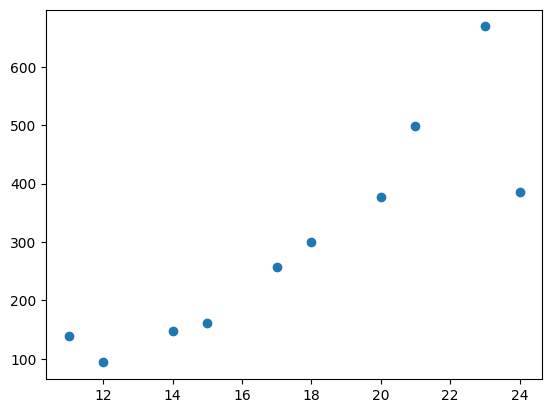

In [85]:
with open("./lin_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_train = data[:, 0]
y = data[:, 1]
plt.scatter(x_train, y)

In [10]:

x_train = standard_scaler.fit_transform(x_train.reshape(-1, 1))

# standard_scaler.fit(x_train)
# x_train = standard_scaler.transform(x_train)
# x_test = standard_scaler.transform(x_test)

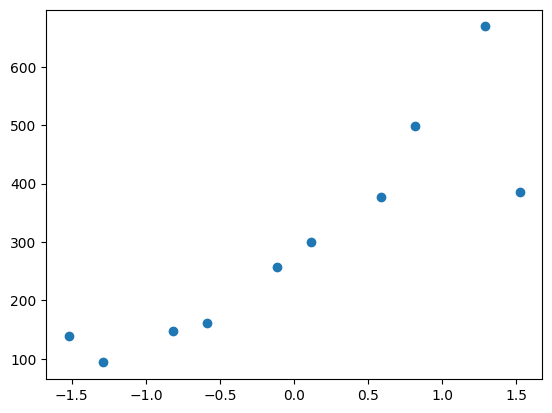

In [87]:
plt.scatter(x_train, y)

In [88]:

x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
print(x_train_poly)
#plt.scatter(x_train_poly, y)

[[ 1.00000000e+00 -1.52153491e+00  2.31506849e+00 -3.52245754e+00
   5.35954213e+00 -8.15473047e+00  1.24077071e+01]
 [ 1.00000000e+00 -1.28745262e+00  1.65753425e+00 -2.13399681e+00
   2.74741978e+00 -3.53717279e+00  4.55394237e+00]
 [ 1.00000000e+00 -8.19288030e-01  6.71232877e-01 -5.49933061e-01
   4.50553575e-01 -3.69133151e-01  3.02426372e-01]
 [ 1.00000000e+00 -5.85205736e-01  3.42465753e-01 -2.00412923e-01
   1.17282792e-01 -6.86345628e-02  4.01653398e-02]
 [ 1.00000000e+00 -1.17041147e-01  1.36986301e-02 -1.60330339e-03
   1.87652468e-04 -2.19630601e-05  2.57058175e-06]
 [ 1.00000000e+00  1.17041147e-01  1.36986301e-02  1.60330339e-03
   1.87652468e-04  2.19630601e-05  2.57058175e-06]
 [ 1.00000000e+00  5.85205736e-01  3.42465753e-01  2.00412923e-01
   1.17282792e-01  6.86345628e-02  4.01653398e-02]
 [ 1.00000000e+00  8.19288030e-01  6.71232877e-01  5.49933061e-01
   4.50553575e-01  3.69133151e-01  3.02426372e-01]
 [ 1.00000000e+00  1.28745262e+00  1.65753425e+00  2.13399681e+0

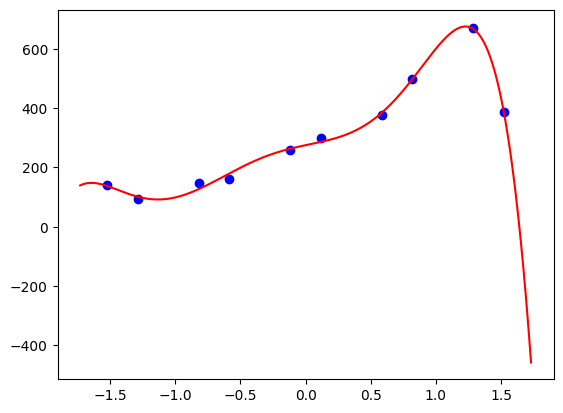

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y)

# Generowanie punktów do wykresu
x_values = np.linspace(10, 24, 1000).reshape(-1, 1)  # Zakres wartości x dla wykresu
x_values = standard_scaler.fit_transform(x_values.reshape(-1, 1))
x_poly_values = poly_features.transform(x_values)  # Generowanie cech wielomianowych dla punktów x_values
y_pred = lin_reg.predict(x_poly_values)
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.plot(x_values, y_pred, color='red', label='Wykres dopasowany')


In [81]:
lin_reg.coef_

array([   0.        ,   93.25913541,  -31.84764993,  281.06603032,
        178.73031283, -123.53249456,  -72.33024354])

In [90]:

def cost_func(x_train, y, x_values, y_pred_values):
    m = y_pred_values.shape[0]
    y_pred_values = []
    for x_i, y_i in zip(x_train, y):
        closest_idx =  np.argmin(abs(x_values-x_i))
        # print(x_values[closest_idx])
        print(x_values[closest_idx], y_pred[closest_idx], y_i)
        y_pred_values.append(y_pred[closest_idx])
    cost = (1 / (2 * m)) * np.sum((y_pred[closest_idx] - y_i) ** 2)
    print(cost)
cost_func(x_train, y, x_values, y_pred)

[-1.52247342] 137.37351220316333 139.66148459455079
[-1.28691439] 100.97502156801073 93.61152898158836
[-0.81926044] 126.97841152387346 147.53490822010792
[-0.58370141] 180.14534342096982 160.79332867608565
[-0.11604746] 263.4149328115569 257.75693508080855
[0.11604746] 285.9332120901572 300.58686315551597
[0.58370141] 384.06792185560835 377.37446403292256
[0.81926044] 497.7047054807815 498.17725977247966
[1.28691439] 667.0058708411677 669.0168866955671
[1.52247342] 384.12553365290586 385.44267757740386
0.0008674340589209938


In [151]:
alpha=0.01
eps=1e-8
def h_fun_ndim(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost_ndim(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    predicted_y = h_fun_ndim(X, theta)
    return  (1 / (2 * m)) * np.sum((predicted_y - y) ** 2)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun_ndim(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        
        cost = calculate_cost_ndim(X, y, theta)
        cost_history.append(cost)
        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun_ndim(X, theta), cost_history[-1]


print(x_train_poly.shape)
# # y_scale = y.max()
# # y_scaled = y / y_scale
# X_scale = x_train_poly.T.max(axis=1)
# X_scale.shape = [-1, 1]
# X_scaled = x_train_poly.T / X_scale
# # print(y_scaled.reshape(1, -1).shape)
# print(X_scaled.shape)
theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
th, points, cost = gradient_descent_ndim(x_train_poly.T, y.reshape(1, -1), theta)
print(th, points, cost)

(10, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1, 7)
grad (1,

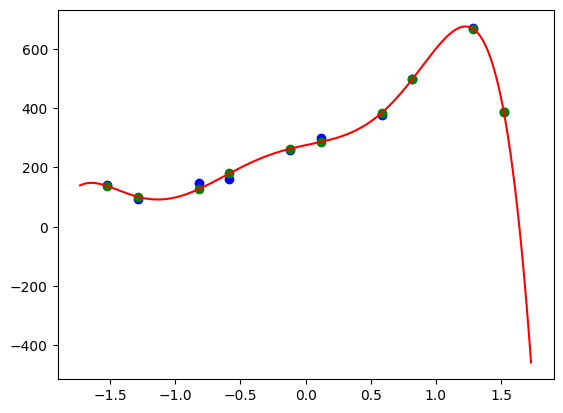

In [124]:
x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_values = standard_scaler.fit_transform(x_new.reshape(-1, 1))
x_new_values = poly_features.transform(x_values)
result = th.T @ x_new_values.T
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.scatter(x_train, points, color='g', label='Punkty oryginalne')
plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')

(7, 5) (7, 1)


4769.487462807049

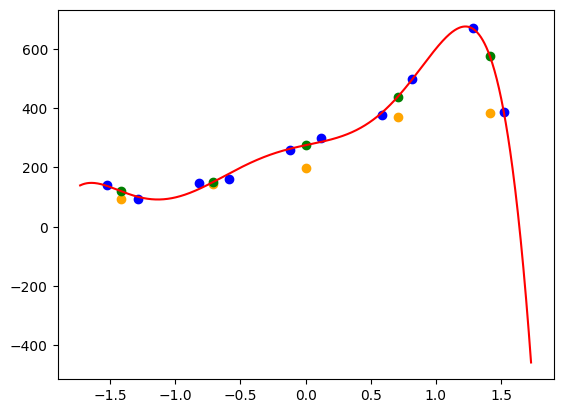

In [141]:
with open("./lin_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_test = data[:, 0]
y_test = data[:, 1]
# plt.scatter(x_test, y_test)
x_test_vals = standard_scaler.fit_transform(x_test.reshape(-1, 1))
x_test_values = poly_features.transform(x_test_vals)
result_test = th.T @ x_test_values.T
# x_poly_values_test = poly_features.transform(x_test.reshape(-1, 1))  # Generowanie cech wielomianowych dla punktów x_values
# y_pred_test = lin_reg.predict(x_poly_values_test)
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
plt.scatter(x_test_vals, result_test.T, color='green', label='Wykres dopasowany')
plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
calculate_cost_ndim(x_test_values.T, y_test.reshape(-1, 1).T, th)


In [172]:
alpha=0.01
eps=1e-8
lambda_ = 10
def h_fun_ndim(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost_ndim(X, y, theta, lambda_):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    predicted_y = h_fun_ndim(X, theta)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return  (1 / (2 * m)) * np.sum((predicted_y - y) ** 2) + sum_of_thetas * lambda_ / (2 * m)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, lambda_=lambda_, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun_ndim(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - alpha * (gradient.T +lambda_ * theta_reg) / m
        
        cost = calculate_cost_ndim(X, y, theta, lambda_)
        cost_history.append(cost)
        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun_ndim(X, theta), cost_history[-1]


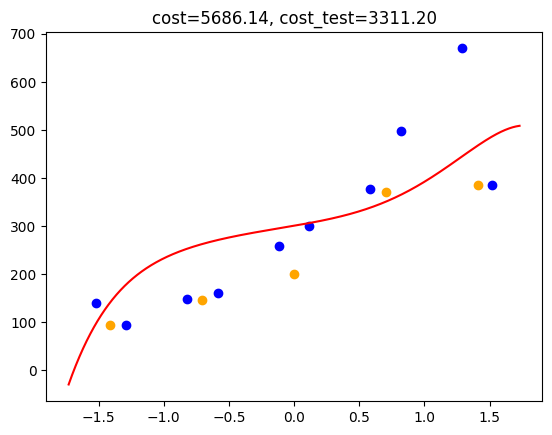

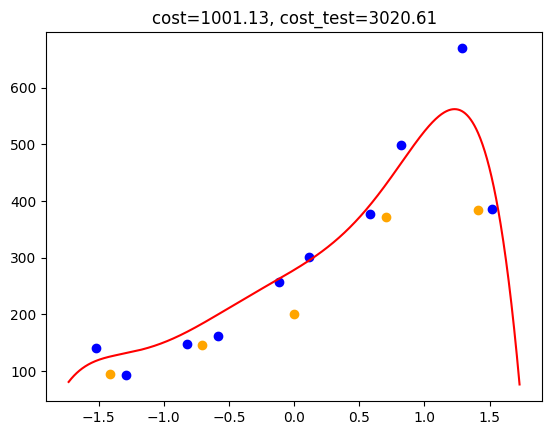

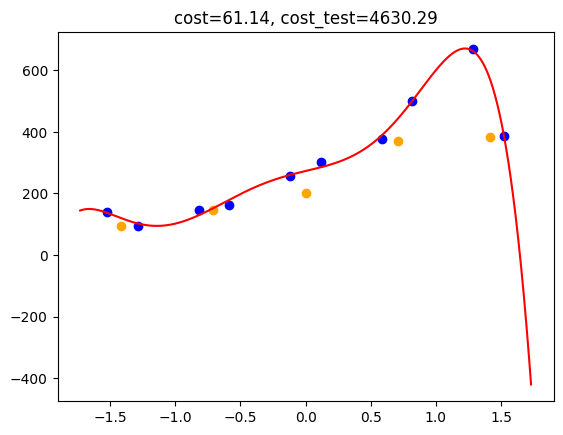

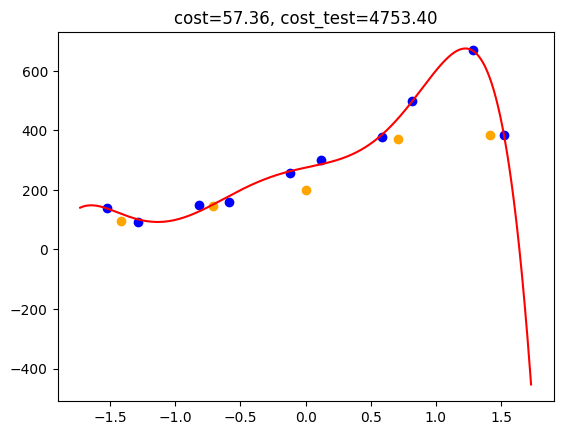

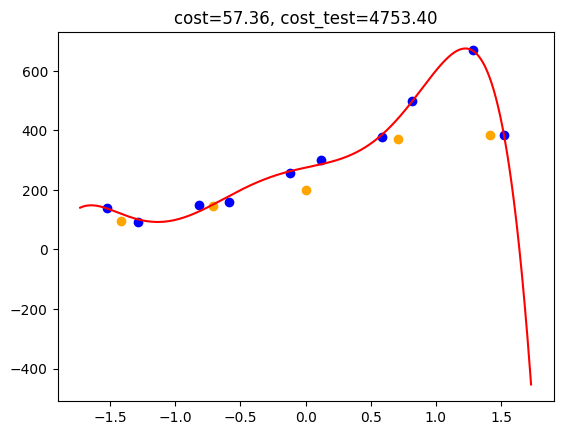

In [175]:
lambdas = [10, 1, 0.01, 0.001, 0.001]
x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_values = standard_scaler.fit_transform(x_new.reshape(-1, 1))
x_new_values = poly_features.transform(x_values)
for lambda_ in lambdas:
    theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
    th, points, cost = gradient_descent_ndim(x_train_poly.T, y.reshape(1, -1), theta, lambda_=lambda_)
    # print(th, points, cost)

    result = th.T @ x_new_values.T
    fig = plt.figure("Figure 1")
    plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
    plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
    plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
    cost_test = calculate_cost_ndim(x_test_values.T, y_test.reshape(1, -1), th, 0)
    cost = calculate_cost_ndim(x_train_poly.T,  y.reshape(1, -1), th, 0)
    plt.title(f'cost={cost:.2f}, cost_test={cost_test:.2f}')
    plt.show()

## Regresja Logistyczna

(50,)


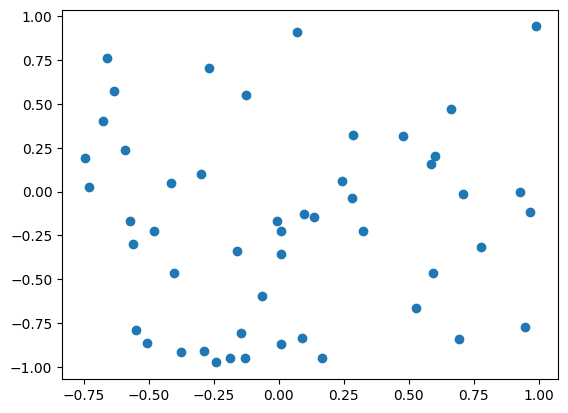

In [94]:
with open("./logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_train_raw = data[:, 0:2]
x1 = x_train_raw[:, 0]
x2 = x_train_raw[:, 1]
y = data[:, 2]
x_train = np.vstack([x1, x2])
plt.scatter(x1, x2)
print(x1.shape)

In [95]:
lambdas = [10, 1, 0.5, 0.1, 0.05, 0.01]
from sklearn.preprocessing import StandardScaler
 
standard_scaler = StandardScaler()

from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree=6)
# x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_train_log_values_raw = standard_scaler.fit_transform(x_train.T)
# x1 = x1.reshape(1, -1)
# x2 = x2.reshape(1, -1)
print(x_train_log_values.shape)
x_train_poly_log = poly_features.fit_transform(x_train_log_values_raw)
# # x_train_poly_log = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2, x1**2, x1**3, x1**4, x1**5, x1**6])
print(x_train_poly_log.shape)

(50, 2)
(50, 28)


In [96]:
alpha=0.1
eps = 1e-7
lambda_=10
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta, lambda_):
    m=y.shape[0]
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return (y_1 + y_0).sum() / X.shape[1] + sum_of_thetas * lambda_ / (2 * m)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, lambda_=lambda_, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - alpha * (gradient.T +lambda_ * theta_reg) / m
        
        cost = calculate_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun(X, theta)

In [97]:
theta = np.zeros((28, 1))
print(theta.shape)
th, h_x = gradient_descent_ndim(x_train_poly_log.T, y, theta, alpha, eps, lambda_=0.01)

(28, 1)


C:\Users\stycz\AppData\Local\Temp\ipykernel_7656\1950818167.py:13: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1-y)*np.log(1-h)
C:\Users\stycz\AppData\Local\Temp\ipykernel_7656\1950818167.py:13: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1-y)*np.log(1-h)


[[ 0.55885318]
 [ 5.4554618 ]
 [ 6.24209929]
 [ 2.43695024]
 [-1.91863621]
 [-0.21473431]
 [-1.46268934]
 [ 2.67809268]
 [-0.97156088]
 [ 1.59913296]
 [-0.25722866]
 [-0.81488243]
 [ 0.53530098]
 [-0.28115095]
 [ 0.03596231]
 [-0.65222631]
 [ 1.70552119]
 [-0.68443911]
 [ 0.67438559]
 [-0.20704084]
 [ 0.48538488]
 [-2.73870757]
 [ 0.32244917]
 [ 0.0952945 ]
 [ 0.17804727]
 [ 0.16940288]
 [ 0.1529945 ]
 [ 0.10787938]] [[5.34554893e-08 8.84015850e-01 4.02081974e-02 9.99915228e-01
  3.53289230e-04 9.97346584e-01 4.01304462e-07 1.00000000e+00
  6.53843390e-04 1.18680769e-15 4.85049234e-06 5.16655906e-06
  1.24534764e-03 1.79664170e-10 8.52951773e-05 1.91234588e-03
  9.95257633e-01 4.79949138e-01 9.99255958e-01 9.99999978e-01
  1.29605716e-37 2.03196448e-14 9.07183086e-01 9.99999966e-01
  1.00000000e+00 3.64959274e-05 1.00000000e+00 2.88098026e-08
  1.94964532e-10 9.99980870e-01 9.99495575e-01 1.36444419e-03
  9.56175459e-01 2.83686365e-08 2.51791070e-52 1.59631914e-01
  1.23171702e-02 9.99

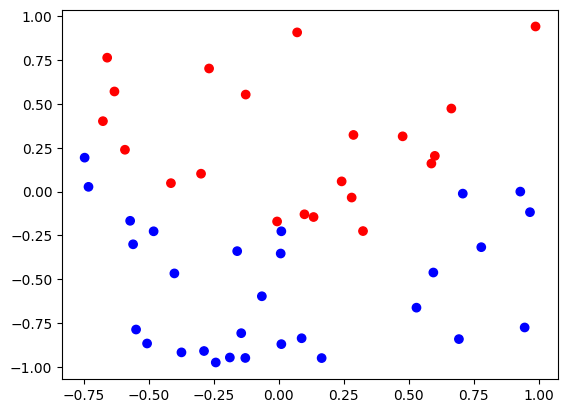

In [101]:
print(th, h_x)
colors = ['r' if val > 0.5  else 'b' for val in h_x.tolist()[0]]
# plt.scatter(x_train_log_values_raw[:, 0], x_train_log_values_raw[:, 1], c=colors)
plt.scatter(x1, x2, c=colors)

### Test data

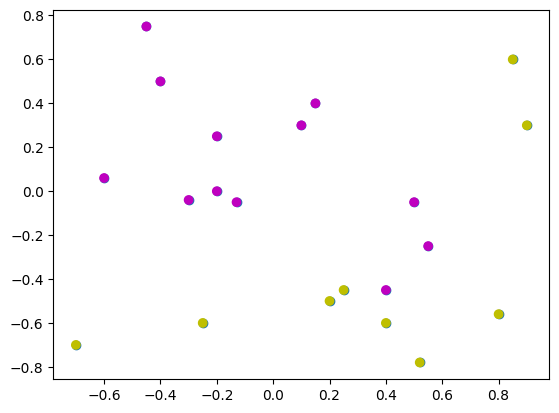

In [99]:
with open("./logi_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_test_raw = data[:, 0:2]
x1_t = x_test_raw[:, 0]
x2_t = x_test_raw[:, 1]
y_t = data[:, 2]
x_test_t = np.vstack([x1_t, x2_t])
plt.scatter(x1_t, x2_t)
x_test_vals_log = standard_scaler.transform(x_test_t.T)
x_test_values_log = poly_features.transform(x_test_vals_log)
result_test_log = th.T @ x_test_values_log.T
colorst = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
# plt.scatter(x_train_log_values_raw[:, 0], x_train_log_values_raw[:, 1], c=colors)
plt.scatter(x1_t, x2_t, c=colorst)
# plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
# plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
# plt.scatter(x_test_vals, result_test.T, color='green', label='Wykres dopasowany')
# plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
# calculate_cost_ndim(x_test_values.T, y_test.reshape(-1, 1).T, th)

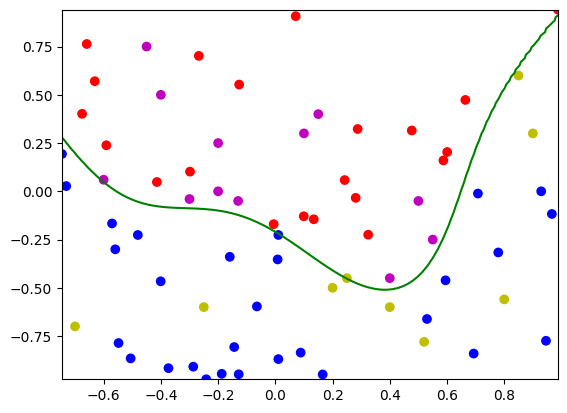

In [102]:
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, th)
h_range_comb.shape = x1x1.shape
result_test_log = th.T @ x_test_values_log.T
colors1 = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
fig = plt.figure("Figure 1")
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
plt.scatter(x1, x2, c=colors)
plt.scatter(x1_t, x2_t, c=colors1)
plt.show()

C:\Users\stycz\AppData\Local\Temp\ipykernel_7656\1950818167.py:13: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1-y)*np.log(1-h)
C:\Users\stycz\AppData\Local\Temp\ipykernel_7656\1950818167.py:13: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1-y)*np.log(1-h)


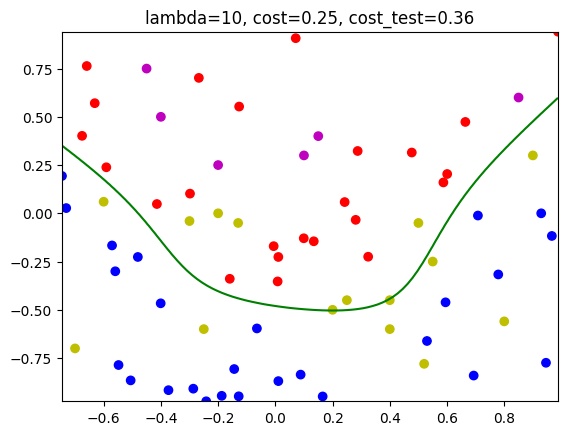

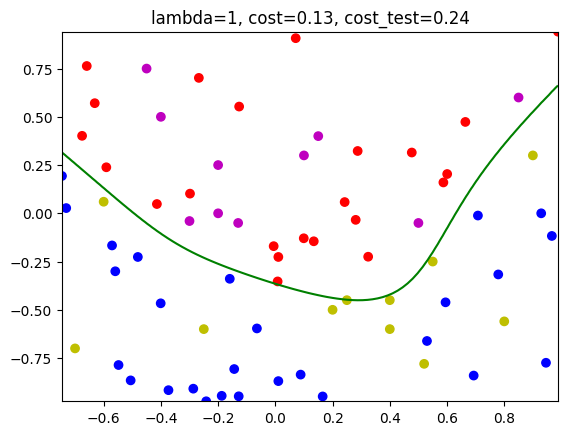

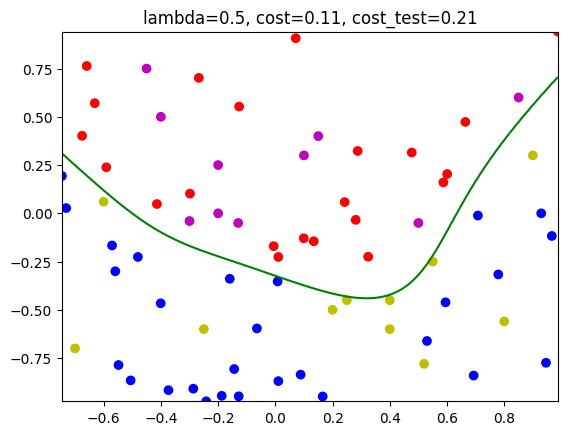

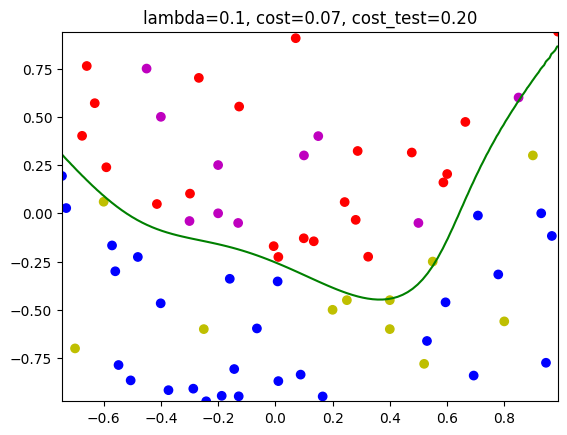

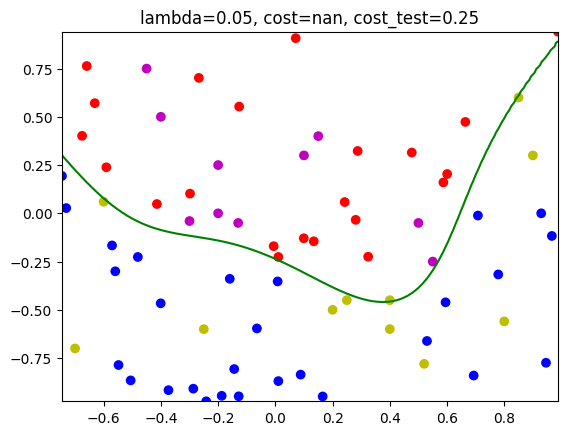

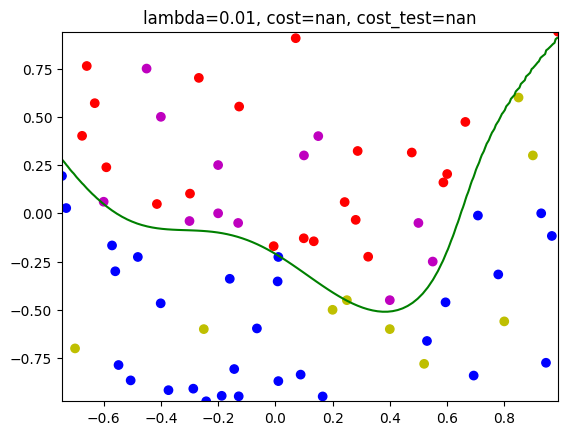

In [103]:

x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
for lambda_ in [10, 1, 0.5, 0.1, 0.05, 0.01]:
    theta = np.zeros((28, 1))
    th, points = gradient_descent_ndim(x_train_poly_log.T, y.reshape(1, -1), theta, lambda_=lambda_)
    colors = ['r' if val > 0.5  else 'b' for val in points.tolist()[0]]
    h_range_comb = h_fun(X_range_comb, th)
    h_range_comb.shape = x1x1.shape
    result_test_log = th.T @ x_test_values_log.T
    colors1 = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
    fig = plt.figure("Figure 1")
    plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
    plt.scatter(x1, x2, c=colors)
    plt.scatter(x1_t, x2_t, c=colors1)
    cost_test = calculate_cost(x_test_values_log.T, y_t.reshape(1, -1), th, 0)
    cost = calculate_cost(x_train_poly_log.T,  y.reshape(1, -1), th, 0)
    plt.title(f'lambda={lambda_}, cost={cost:.2f}, cost_test={cost_test:.2f}')
    plt.show()

In [106]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
 
data = load_iris()
x = data.data
y = data.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [109]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
 
log_regr = LogisticRegression(penalty='l2')
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       0.94      0.94      0.94        17\n           2       0.92      0.92      0.92        12\n\n    accuracy                           0.96        45\n   macro avg       0.95      0.95      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'